# Classification on CIFAR 10 Dataset

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import os
from __future__ import print_function

from builtins import range
from six.moves import cPickle as pickle
from imageio import imread
import platform
# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Observations:

- six is a module in python which helps the code to run on both python 2 and python 3 without any modifications.

- Python 3 reorganized the standard library and moved several functions to different modules. Six provides a consistent interface to them through the fake six.moves module

- Some modules which had two implementations have been merged in Python 3. For example, cPickle no longer exists in Python 3; it was merged with pickle. In these cases, fetching the fast version will load the fast one on Python 2 and the merged module in Python 3.

- The Platform module is used to retrieve as much possible information about the platform on which the program is being currently executed. Now by platform info, it means information about the device, it’s OS, node, OS version, Python version, etc. This module plays a crucial role when you want to check whether your program is compatible with the python version installed on a particular system or whether the hardware specifications meet the requirements of your program.

In [ ]:
# # Use this code to download the dataset for the first time
# # You will be required to install wget using pip
# # For Linux users checkout the alternative for 'del'

!wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -O cifar-10-python.tar.gz
!tar -xzvf cifar-10-python.tar.gz
!del cifar-10-python.tar.gz

--2021-03-15 11:08:04--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  31.6MB/s    in 5.8s    

2021-03-15 11:08:10 (28.0 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1
/bin/bash: del: command not found


In [ ]:
# This cell loads the training and testing dataset. Please note the variables at
# the end of the cell as you would require them to access the train/test data 
# and labels throughout the assignment
def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))


def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        Y = np.array(Y)
        return X, Y


def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte


cifar10_dir = 'cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times
try:
    del X_train, y_train
    del X_test, y_test
    print('Clear previously loaded data.')
except:
    pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


In [ ]:
(cifar10_dir)

'cifar-10-batches-py'

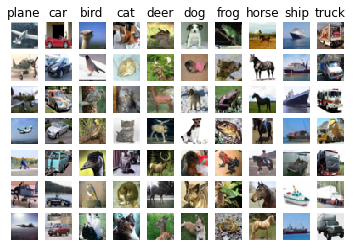

In [ ]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [ ]:
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
##X_train = np.reshape(X_train, (X_train.shape[0], -1))
##X_test = np.reshape(X_test, (X_test.shape[0], -1))
##print(max(list(X_train[0])))

In [ ]:
y_train.shape

(5000,)

In [ ]:
np.reshape(X_train, (X_train.shape[0], -1)).shape

(5000, 3072)

In [ ]:
X_train.shape

(5000, 32, 32, 3)

In [ ]:
X_test

array([[[[158., 112.,  49.],
         [159., 111.,  47.],
         [165., 116.,  51.],
         ...,
         [137.,  95.,  36.],
         [126.,  91.,  36.],
         [116.,  85.,  33.]],

        [[152., 112.,  51.],
         [151., 110.,  40.],
         [159., 114.,  45.],
         ...,
         [136.,  95.,  31.],
         [125.,  91.,  32.],
         [119.,  88.,  34.]],

        [[151., 110.,  47.],
         [151., 109.,  33.],
         [158., 111.,  36.],
         ...,
         [139.,  98.,  34.],
         [130.,  95.,  34.],
         [120.,  89.,  33.]],

        ...,

        [[ 68., 124., 177.],
         [ 42., 100., 148.],
         [ 31.,  88., 137.],
         ...,
         [ 38.,  97., 146.],
         [ 13.,  64., 108.],
         [ 40.,  85., 127.]],

        [[ 61., 116., 168.],
         [ 49., 102., 148.],
         [ 35.,  85., 132.],
         ...,
         [ 26.,  82., 130.],
         [ 29.,  82., 126.],
         [ 20.,  64., 107.]],

        [[ 54., 107., 160.],
       

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca1=PCA(0.90)

In [ ]:
img_pca=pca1.fit_transform(X_train)

In [ ]:
pca1.n_components_

95

In [ ]:
X_train1,X_test1,Y_train1,Y_test1=train_test_split(img_pca,y_train,test_size=0.2)

In [ ]:
X_train1.shape,X_test1.shape,Y_train1.shape,Y_test1.shape

((4000, 95), (1000, 95), (4000,), (1000,))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,precision_recall_fscore_support,classification_report,roc_auc_score,roc_curve

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


## Defining all the algorithms 

##Logistic Regression

The output for linear regression is a number that has its real meaning.

The output for a logistic regression is a number that represents the probability of the event happening (i.e. the probability of people clicking an ad online, the probability of death in titanic disaster, etc.)

The intuition behind logistic regression is to transform the output of a linear regression which has a wider range, to a range that probability lies in, which is [0,1]. The transformation formula is Logit that maps a value to a number in the range [0,1].

If p is a probability, then p/(1 − p) is the corresponding odds; the logit of the probability is the logarithm of the odds, i.e.

<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/615dd158653c25cefa4998c6868c7200e70be71d'>

Cost Function:

<img src='https://joparga3.github.io/standford_logistic_regression/images/32.PNG'>

## Advantages:

1- Probability Prediction

Compared to some other machine learning algorithms, Logistic Regression will provide probability predictions and not only classification labels (think kNN).

Depending on your output needs this can be very useful if you'd like to have probability results especially if you want to integrate this implementation with another system that works on probability measures.

Eg:-Bank loans can be another field where you want probability on the client rather than such a strict binary answer.

2- Thrives with Little Training

One of the great advantages of Logistic Regression is that when you have a complicated linear problem and not a whole lot of data it's still able to produce pretty useful predictions. This is a pro that comes with Logistic Regression's mathematical foundations and won't be possible with most other Machine Learning models.

3- Efficient Computation

Logistic Regression is not a resource hungry model (unlike many others, think NNs, SVM, kNN) and this makes it suitable for some simple applications.

4- Unlikely to Overfit

Logistic Regression won't overfit easily as it's a linear model. Especially with the C regularization parameter in scikitlearn you can easily take control of any overfitting anxiety you might have.

5-Model Flexibility (Regularization)

Logistic Regression actually has some nice fitting flexibility. By using the regularization parameter one can apply different regularization techniques to Logistic Regression to reduce the error in the model or fine tune the fitting.
Lasso, Ridge or Elasticnet regularization models can be applied in this sense. Regularization will make Logistic Regression behave more similarly to Naive Bayes in the sense that, it will become a more generalist model and tend to avoid noise and outliers.



## Decision Tree Classifier

The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. For a classification model, the target values are discrete in nature, whereas, for a regression model, the target values are represented by continuous values. Unlike the black box type of algorithms such as Neural Network, Decision Trees are comparably easier to understand because it shares internal decision-making logic (you will find details in the following session).

There are 4 popular types of decision tree algorithms: ID3, CART (Classification and Regression Trees), Chi-Square, and Reduction in Variance.

<img src='https://miro.medium.com/max/1430/1*rSQIIAboJftqAv_BReNipg.png'>


## Entropy:

<img src='https://miro.medium.com/max/525/0*veoQf5CRA0k_kDVl.jpeg'>

## The Equation of Information gain:

<img src='https://miro.medium.com/max/875/1*bVGWGETTor7bSnhr7sXEVw.png'>

## Advantages:

- Compared to other algorithms decision trees requires less effort for data preparation during pre-processing.
- A decision tree does not require normalization of data.
- A decision tree does not require scaling of data as well.
- Missing values in the data also do NOT affect the process of building a decision tree to any considerable extent.
- A Decision tree model is very intuitive and easy to explain to technical teams as well as stakeholders.

## Disadvantage:
- A small change in the data can cause a large change in the structure of the decision tree causing instability.
-For a Decision tree sometimes calculation can go far more complex compared to other algorithms.
-Decision tree often involves higher time to train the model.
-Decision tree training is relatively expensive as the complexity and time has taken are more.
-The Decision Tree algorithm is inadequate for applying regression and predicting continuous values.



## Random Forest:

Ensembles are a divide-and-conquer approach used to improve performance. The main principle behind ensemble methods is that a group of “weak learners” can come together to form a “strong learner”. The figure below (taken from here) provides an example. Each classifier, individually, is a “weak learner,” while all the classifiers taken together are a “strong learner”.

# Advantages of using random forest:

1.Since we are using multiple decision trees, the bias remains same as that of a single decision tree. However, the variance decreases and thus we decrease the chances of overfitting. I have explained bias and variance intuitively at The curse of bias and variance.

2.When all you care about is the predictions and want a quick and dirty way out, random forest comes to the rescue. You don't have to worry much about the assumptions of the model or linearity in the dataset. 

# Advantages of using random forest:
1.Random forests don't train well on smaller datasets as it fails to pick on the pattern. To simplify, say we know that 1 pen costs INR 1, 2 pens cost INR 2, 3 pens cost INR 6. In this case, linear regression will easily estimate the cost of 4 pens but random forests will fail to come up with a good estimate.

2.There is a problem of interpretability with random forest. You can't see or understand the relationship between the response and the independent variables. Understand that random forest is a predictive tool and not a descriptive tool. You get variable importance but this may not suffice in many analysis of interests where the objective might be to see the relationship between response and the independent features.

3.The time taken to train random forests may sometimes be too huge as you train multiple decision trees. Also, in the case of a categorical variable, the time complexity increases exponentially. For a categorical column with n levels, RF tries split at 2^n -1 points to find the maximal splitting point. 

4.In the case of a regression problem, the range of values response variable can take is determined by the values already available in the training dataset. Unlike linear regression, decision trees and hence random forest can't take values outside the training data. 



## K-Nearest Neighbors:

- K-NN has no assumptions: K-NN is a non-parametric algorithm which means there are assumptions to be met to implement K-NN. Parametric models like linear regression has lots of assumptions to be met by data before it can be implemented which is not the case with K-NN.
-No Training Step: K-NN does not explicitly build any model, it simply tags the new data entry based learning from historical data. New data entry would be tagged with majority class in the nearest neighbor.
-It constantly evolves: Given it’s an instance-based learning; k-NN is a memory-based approach. The classifier immediately adapts as we collect new training data. It allows the algorithm to respond quickly to changes in the input during real-time use.
-Very easy to implement for multi-class problem: Most of the classifier algorithms are easy to implement for binary problems and needs effort to implement for multi class whereas K-NN adjust to multi class without any extra efforts.
-Can be used both for Classification and Regression: One of the biggest advantages of K-NN is that K-NN can be used both for classification and regression problems.
-One Hyper Parameter: K-NN might take some time while selecting the first hyper parameter but after that rest of the parameters are aligned to it.
-Variety of distance criteria to be choose from: K-NN algorithm gives user the flexibility to choose distance while building K-NN model.
 - Euclidean Distance
 - Hamming Distance
 - Manhattan Distance
 - Minkowski Distance

## Cons of K-NN.

- K-NN slow algorithm: K-NN might be very easy to implement but as dataset grows efficiency or speed of algorithm declines very fast.
- Curse of Dimensionality: KNN works well with small number of input variables but as the numbers of variables grow K-NN algorithm struggles to predict the output of new data point.
- K-NN needs homogeneous features: If you decide to build k-NN using a common distance, like Euclidean or Manhattan distances, it is completely necessary that features have the same scale, since absolute differences in features weight the same, i.e., a given distance in feature 1 must means the same for feature 2.
- Optimal number of neighbors: One of the biggest issues with K-NN is to choose the optimal number of neighbors to be consider while classifying the new data entry.
- Imbalanced data causes problems: k-NN doesn’t perform well on imbalanced data. If we consider two classes, A and B, and the majority of the training data is labeled as A, then the model will ultimately give a lot of preference to A. This might result in getting the less common class B wrongly classified.
- Outlier sensitivity: K-NN algorithm is very sensitive to outliers as it simply chose the neighbors based on distance criteria.
Missing Value treatment: K-NN inherently has no capability of dealing with missing value problem.


## Support Vector Machine

## Advantages:
- SVM works relatively well when there is a clear margin of separation between classes.
- SVM is more effective in high dimensional spaces.
- SVM is effective in cases where the number of dimensions is greater than the number of samples.
- SVM is relatively memory efficient.

## Disadvantages:
- SVM algorithm is not suitable for large data sets.
- SVM does not perform very well when the data set has more noise i.e. target classes are overlapping.
- In cases where the number of features for each data point exceeds the number of training data samples, the SVM will underperform.
- As the support vector classifier works by putting data points, above and below the classifying hyperplane there is no probabilistic explanation for the classification.

## Pros and Cons of Xgboost
## Pros:
- Extremely fast (parallel computation).
- Highly efficient.
- Versatile (Can be used for classification, regression or ranking).
- Can be used to extract variable importance.
- Do not require feature engineering (missing values imputation, scaling and normalization)
##Cons:
-Only work with numeric features.
-Leads to overfitting if hyperparameters are not tuned properly.


In [ ]:
lr=LogisticRegression(random_state=100,C=1.0)
dt=DecisionTreeClassifier(max_depth=100,max_features='sqrt',random_state=0)
rf=RandomForestClassifier(random_state=100)
knn=KNeighborsClassifier(n_neighbors=10,p=1,metric='manhattan')
xgb=XGBClassifier(learning_rate=0.1,n_estimators=50)
xgb1=XGBClassifier(max_depth=5,random_state=100)
adaboost=AdaBoostClassifier(learning_rate=0.1,n_estimators=100)
Gbclassifier=GaussianNB()
svm_classifier=svm.SVC(kernel='linear',decision_function_shape='ovo')
svm_classifier1=svm.SVC(kernel='sigmoid',decision_function_shape='ovo')

In [ ]:
y_train

array([6, 9, 9, ..., 5, 4, 6])

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 505,
 1: 460,
 2: 519,
 3: 486,
 4: 519,
 5: 488,
 6: 519,
 7: 486,
 8: 520,
 9: 498}

In [ ]:
def Model_cv(X_train,X_test,Y_train,Y_test,model):
    
    sc=StandardScaler()
    
    X_train=sc.fit_transform(X_train)
    X_test=sc.fit_transform(X_test)
     
    model.fit(X_train,Y_train)
    #Test data prediction
    y_pred=model.predict(X_test)
    
    # Train data Predcition
    y_train_pred=model.predict(X_train)
    
    
    print(cross_val_score(model,X_train,Y_train,cv=7,scoring='accuracy').mean())
    
    training_Score = accuracy_score(Y_train,y_train_pred.round())
    testing_score = accuracy_score(Y_test,y_pred.round())
    
    print('Metrics for the model',model)
    
    print("Trainig Score_",  training_Score)
    print("Testing Score_",testing_score)

    print(confusion_matrix(Y_train,y_train_pred))
    
    print(confusion_matrix(Y_test,y_pred))
    
    print('Classification report on training',classification_report(Y_train,y_train_pred))
    
    print('Classification report on testing',classification_report(Y_test,y_pred))
    
    print('Precison Score on Training',precision_score(Y_train,y_train_pred.round(),average=None))
 
    print('Precison Score on Testing',precision_score(Y_test,y_pred.round(),average=None))

In [ ]:
Model_cv(X_train,X_test,y_train,y_test,lr)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.26919718936525655
Metrics for the model LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=100, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Trainig Score_ 0.7574
Testing Score_ 0.268
[[386   6  16  11   8  11   8  11  37  11]
 [  9 379  11  12   6   9   8   4   9  13]
 [ 16  11 365  15  33  28  18  12  16   5]
 [ 13   9  19 345  15  33  27   8   6  11]
 [ 11   5  29  26 367  19  31  17   8   6]
 [  5  12  28  39  27 331  14  13  11   8]
 [  5   4  17  26  18  12 420   7   6   4]
 [ 11  10  19  17  23  15   4 366  10  11]
 [ 41   9   9  10   6   9   3   2 416  15]
 [ 17  14   9   6   3   6  10   6  15 412]]
[[16  1  7  4  1  4  3  8 10  3]
 [ 5 13  3  2  4  0  4  2  0  8]
 [ 2  4  9  5 11  5  4  4  6  1]
 [ 0  3  4  9  5  7  7  7  4  3]
 [ 3  1  3  7  7  5  6  6  

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
Model_cv(X_train1,X_test1,Y_train1,Y_test1,lr)

0.3547494536986657
Metrics for the model LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=100, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Trainig Score_ 0.43925
Testing Score_ 0.351
[[201  17  25   7   9  18   8  19  80  29]
 [ 13 181  17   7  11  15  16  18  24  49]
 [ 32  13 137  25  49  39  57  27  23  11]
 [ 19  14  38 129  28  67  52  12  13  24]
 [ 22  11  61  24 147  36  47  40  13  15]
 [ 10  18  24  52  39 168  38  29  13  10]
 [  4  11  37  45  37  39 201  21   6  10]
 [ 23  19  17  28  43  25  22 173  15  25]
 [ 80  21  14  10   3  19   5   9 220  35]
 [ 31  48   8  15   6  10  22  22  31 200]]
[[37  5  1  4  2  8  2  4 24  5]
 [ 8 38  5  6  0 11 10  5  6 20]
 [10  3 34  5 16 14  8  9  7  0]
 [ 3  7 12 14  3 26 11  1  4  9]
 [ 4  1 11  4 33  6 24 16  

In [ ]:
Model_cv(X_train,X_test,y_train,y_test,dt)

0.22620292872393716
Metrics for the model DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=100, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')
Trainig Score_ 1.0
Testing Score_ 0.202
[[505   0   0   0   0   0   0   0   0   0]
 [  0 460   0   0   0   0   0   0   0   0]
 [  0   0 519   0   0   0   0   0   0   0]
 [  0   0   0 486   0   0   0   0   0   0]
 [  0   0   0   0 519   0   0   0   0   0]
 [  0   0   0   0   0 488   0   0   0   0]
 [  0   0   0   0   0   0 519   0   0   0]
 [  0   0   0   0   0   0   0 486   0   0]
 [  0   0   0   0   0   0   0   0 520   0]
 [  0   0   0   0   0   0   0   0   0 498]]
[[15  3  6  2  2  5  4  2 10  8]
 [ 2  8  5  2  3  2  3  5  5 

In [ ]:
Model_cv(X_train1,X_test1,Y_train1,Y_test1,dt)

0.18850807686184218
Metrics for the model DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=100, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')
Trainig Score_ 1.0
Testing Score_ 0.173
[[413   0   0   0   0   0   0   0   0   0]
 [  0 351   0   0   0   0   0   0   0   0]
 [  0   0 413   0   0   0   0   0   0   0]
 [  0   0   0 396   0   0   0   0   0   0]
 [  0   0   0   0 416   0   0   0   0   0]
 [  0   0   0   0   0 401   0   0   0   0]
 [  0   0   0   0   0   0 411   0   0   0]
 [  0   0   0   0   0   0   0 390   0   0]
 [  0   0   0   0   0   0   0   0 416   0]
 [  0   0   0   0   0   0   0   0   0 393]]
[[16  7  8  7 12 11  4  6 16  5]
 [ 8 21  8 14  9  9 13  7  6 

In [ ]:
Model_cv(X_train,X_test,y_train,y_test,rf)

0.3902033540689002
Metrics for the model RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)
Trainig Score_ 1.0
Testing Score_ 0.362
[[505   0   0   0   0   0   0   0   0   0]
 [  0 460   0   0   0   0   0   0   0   0]
 [  0   0 519   0   0   0   0   0   0   0]
 [  0   0   0 486   0   0   0   0   0   0]
 [  0   0   0   0 519   0   0   0   0   0]
 [  0   0   0   0   0 488   0   0   0   0]
 [  0   0   0   0   0   0 519   0   0   0]
 [  0   0   0   0   0   0   0 486   0   0]
 [  0   0   0   0   0   0   0

In [ ]:
Model_cv(X_train1,X_test1,Y_train1,Y_test1,rf)

0.36274977211929926
Metrics for the model RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)
Trainig Score_ 1.0
Testing Score_ 0.397
[[413   0   0   0   0   0   0   0   0   0]
 [  0 351   0   0   0   0   0   0   0   0]
 [  0   0 413   0   0   0   0   0   0   0]
 [  0   0   0 396   0   0   0   0   0   0]
 [  0   0   0   0 416   0   0   0   0   0]
 [  0   0   0   0   0 401   0   0   0   0]
 [  0   0   0   0   0   0 411   0   0   0]
 [  0   0   0   0   0   0   0 390   0   0]
 [  0   0   0   0   0   0   

In [ ]:
Model_cv(X_train,X_test,y_train,y_test,knn)

0.31040192300696506
Metrics for the model KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=1,
                     weights='uniform')
Trainig Score_ 0.4176
Testing Score_ 0.294
[[323   1  53   2  16   0  15   3  90   2]
 [ 49 112  41  12  99   9  35   7  76  20]
 [ 46   0 312  19  91   3  19   5  23   1]
 [ 36   5  93 141 110  23  45   8  24   1]
 [ 37   3 115   8 310   2  23   6  14   1]
 [ 44   1  93  47 114 125  36   6  20   2]
 [ 21   3 145  13 124   4 203   1   5   0]
 [ 51   3  92  20 146  10  19 115  21   9]
 [ 91   6  27   5  30   9   7   4 334   7]
 [ 63  27  52  19  53   4  25  26 116 113]]
[[27  0  5  0  4  0  2  1 17  1]
 [ 3  4  6  1 12  0  3  0 10  2]
 [10  0 24  2 11  1  2  0  1  0]
 [ 2  0 13  7 11  5  9  1  1  0]
 [ 3  0 10  0 16  1  5  0  4  1]
 [ 5  1 10  2 16  5  6  1  2  0]
 [ 1  0 13  3 20  0 13  1  3  0]
 [ 5  0 13  1 14  2  7  2  2  1]
 [ 8  0  3  2  3  1  0  0 40  0]

In [ ]:
Model_cv(X_train1,X_test1,Y_train1,Y_test1,knn)

0.20374065514170595
Metrics for the model KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=1,
                     weights='uniform')
Trainig Score_ 0.30975
Testing Score_ 0.213
[[289   0  50   1  32   0  11   0  30   0]
 [ 84  33  84   8  71   2  36   0  33   0]
 [ 42   1 248   3 105   3   8   0   3   0]
 [ 52   0 149  43  94  11  42   1   4   0]
 [ 33   0 106   2 265   1   6   0   3   0]
 [ 43   1 141  11 119  45  38   1   2   0]
 [ 24   1 115   7 130   2 129   0   3   0]
 [ 59   0 122   5 144   6  22  30   2   0]
 [135   0  71   3  45   1   6   1 154   0]
 [ 90   2  92  15  99   2  44   5  41   3]]
[[39  0 24  0 14  0  2  0 13  0]
 [28  1 21  1 25  0 14  0 19  0]
 [17  0 48  1 33  0  6  0  1  0]
 [14  0 30  6 23  2 14  0  1  0]
 [ 8  0 31  0 60  0  3  0  1  0]
 [11  0 31  0 24  6 15  0  0  0]
 [10  0 28  1 43  0 26  0  0  0]
 [12  0 27  3 37  0  7  7  3  0]
 [44  0 21  0 15  0  4  1 19  0

In [ ]:
Model_cv(X_train,X_test,y_train,y_test,svm_classifier)

0.29619512140520543
Metrics for the model SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Trainig Score_ 1.0
Testing Score_ 0.284
[[505   0   0   0   0   0   0   0   0   0]
 [  0 460   0   0   0   0   0   0   0   0]
 [  0   0 519   0   0   0   0   0   0   0]
 [  0   0   0 486   0   0   0   0   0   0]
 [  0   0   0   0 519   0   0   0   0   0]
 [  0   0   0   0   0 488   0   0   0   0]
 [  0   0   0   0   0   0 519   0   0   0]
 [  0   0   0   0   0   0   0 486   0   0]
 [  0   0   0   0   0   0   0   0 520   0]
 [  0   0   0   0   0   0   0   0   0 498]]
[[19  2  6  2  1  1  4  5 15  2]
 [ 2 20  2  1  1  2  2  3  3  5]
 [ 5  1 15  6  8  7  2  4  3  0]
 [ 2  5  6  9  8  7  3  3  5  1]
 [ 5  2  7  5  8  2  5  5  1  0]
 [ 5  2  5  9  8  8  5  3  1  2]
 [ 2  5  7  9  8  6 16  0  1  0]
 [ 

In [ ]:
Model_cv(X_train1,X_test1,Y_train1,Y_test1,svm_classifier)

0.3424985697314944
Metrics for the model SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Trainig Score_ 0.50425
Testing Score_ 0.338
[[239  12  28  11   9  15   4  17  59  19]
 [ 14 218  18  12   5  12   7  11  14  40]
 [ 39  17 185  27  42  29  36  18  14   6]
 [ 17  14  38 166  27  55  43  11   9  16]
 [ 22  10  66  29 170  34  32  36   9   8]
 [ 12  16  34  56  32 195  22  21   5   8]
 [  3   5  39  63  40  33 208  12   3   5]
 [ 28  13  22  20  43  30  18 193   7  16]
 [ 76  23  12  10   6  15   4   7 232  31]
 [ 32  48   9  17   4   6  12  24  30 211]]
[[39  8  5  3  2  1  3  6 21  4]
 [ 7 39  6  9  1  9  5  5  6 22]
 [11  4 35  7 17 11  9  5  4  3]
 [ 7  8 13 22  4 18  7  3  2  6]
 [ 6  1 15  7 30  8 18 16  0  2]
 [ 7  3 10 18 11 22  5  3  6  2]
 [ 1  4 19 20 13  6 38  3  1  3]


In [ ]:
Model_cv(X_train,X_test,y_train,y_test,xgb)

0.3954012374180441
Metrics for the model XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
Trainig Score_ 0.6862
Testing Score_ 0.38
[[358   5  16   5   6   5  10  11  75  14]
 [ 10 338  10   6  12  21   5   6  16  36]
 [ 36   8 297  10  56  12  56  16  18  10]
 [ 13   8  31 245  34  45  64   7  14  25]
 [ 30   4  25   5 351  11  55  13  16   9]
 [ 13   5  34  12  30 330  38   7  12   7]
 [ 10   6  22   6  33  11 411   6   5   9]
 [ 14   7  21   8  50  16  23 313  13  21]
 [ 42  17   1   8  10   9  11   4 400  18]
 [ 17  17  11   8   5  10  17  12  13 388]]
[[24  1  3  0  3  

In [ ]:
Model_cv(X_train1,X_test1,Y_train1,Y_test1,xgb)

0.36299908497806926
Metrics for the model XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
Trainig Score_ 0.625
Testing Score_ 0.37
[[273   8  15  14   9   8   2   9  55  20]
 [ 15 229   9  11   6   7   7   8  30  29]
 [ 44   7 199  25  45  12  38  17  16  10]
 [ 14   8  25 211  13  45  39   9  14  18]
 [ 29   3  24  21 233  14  46  14  15  17]
 [  8   5  28  27  24 255  17  13  13  11]
 [  8   9  33  19  34  11 276   5   5  11]
 [ 14  11  21  18  26  12  16 239   9  24]
 [ 36  12   9   5   7  10   7   3 302  25]
 [  8  21   8   9   7   6   7  17  27 283]]
[[48  2  3  1  1  

In [ ]:
Model_cv(X_train1,X_test1,Y_train1,Y_test1,xgb1)

0.38149766170781935
Metrics for the model XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
Trainig Score_ 0.99225
Testing Score_ 0.404
[[411   0   0   0   1   0   0   0   1   0]
 [  0 350   1   0   0   0   0   0   0   0]
 [  1   0 405   0   3   0   4   0   0   0]
 [  0   0   2 393   1   0   0   0   0   0]
 [  1   0   1   0 409   0   4   0   1   0]
 [  0   0   1   0   2 396   1   0   1   0]
 [  0   0   0   0   3   0 408   0   0   0]
 [  0   0   1   0   1   0   0 388   0   0]
 [  0   0   0   0   0   0   0   0 416   0]
 [  0   0   0   0   0   0   0   0   0 393]]
[[50  3  3  

In [ ]:
Model_cv(X_train,X_test,y_train,y_test,adaboost)

0.310589130757198
Metrics for the model AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=100, random_state=None)
Trainig Score_ 0.3378
Testing Score_ 0.312
[[243  29  35   6  12  29  11  31  83  26]
 [ 31 132  20  21  14  42  36   9  54 101]
 [ 75  32  87  11  83  42 126  39  11  13]
 [ 38  29  37  45  48  91 105  49  20  24]
 [ 44  12  39  12 142  44 177  31   4  14]
 [ 19  21  56  25  53 186  68  29  20  11]
 [  9  18  33  12  65  48 277  44   2  11]
 [ 40  25  12  10  92  56  57 138  17  39]
 [117  27  19  10   1  48  10  12 199  77]
 [ 39  49  15   8   1  12  31  45  58 240]]
[[21  2  5  1  1  2  4  5  8  8]
 [ 1 13  2  1  1  4  3  3  5  8]
 [ 8  4  7  0 11  6  7  4  3  1]
 [ 0  1  5  7  5 15  7  6  1  2]
 [ 4  4  2  0 12  4 11  2  0  1]
 [ 3  0  1  4 10 14  6  6  3  1]
 [ 0  1  8  4  4  1 32  3  0  1]
 [ 5  2  8  3  8  2  5 11  2  1]
 [14  4  3  1  1  6  0  1 19  8]
 [ 6  6  2  2  1  0  3  4 12 20]]
Classification repo

In [ ]:
Model_cv(X_train1,X_test1,Y_train1,Y_test1,adaboost)

0.30774785634680557
Metrics for the model AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=100, random_state=None)
Trainig Score_ 0.342
Testing Score_ 0.329
[[184  17  39  25   9  18   2  13  69  37]
 [ 18  87  10  29  11  37  16  12  34  97]
 [ 52   7 110  27  82  17  65  21  10  22]
 [ 27  14  34 100  26  82  50  20  11  32]
 [ 26   8  46  33 135  30  77  27  13  21]
 [ 15  10  30  83  41 145  32  22  11  12]
 [  9  13  42  54  59  50 146  22   2  14]
 [ 15  17  29  34  70  29  36  99  10  51]
 [ 98  21   7  10  11  39   2   9 156  63]
 [ 26  41  14  20   6   9  12  19  40 206]]
[[48  4  9  3  1  4  1  5 13  4]
 [ 3 23  5  8  8 16 10  6  9 21]
 [13  1 29  7 17  7 15  7  7  3]
 [ 1  3  6 22  6 27  9  5  6  5]
 [ 3  1  9  4 39  6 28  9  1  3]
 [ 5  2  8 13 11 25  3  7  6  7]
 [ 3  2 12 15 11 12 38  9  2  4]
 [ 5  4  8  6 19  7 10 21  5 11]
 [34  7  4  3  1  7  0  1 36 11]
 [ 7  9  7 10  2  2  3  7 10 48]]
Classification rep

In [ ]:
Model_cv(X_train,X_test,y_train,y_test,Gbclassifier)

0.29439775910364147
Metrics for the model GaussianNB(priors=None, var_smoothing=1e-09)
Trainig Score_ 0.3032
Testing Score_ 0.292
[[233  17  10   3  40  18  31   8 112  33]
 [ 46  77  14  14  34  49  70   6  50 100]
 [113  11  45   5 148  20 113  15  28  21]
 [ 76  14  25  33  68  84 123  13  23  27]
 [ 37   4  33   5 236  27 117  14  25  21]
 [ 59  12  28  17  90 144  87  12  22  17]
 [ 50  11  28  10 126  23 231  12   6  22]
 [ 53  17  23   9 121  43  55  57  30  78]
 [102  17   8   3  27  40  25   7 233  58]
 [ 53  38  12   6  14  14  44  24  66 227]]
[[23  1  2  1  1  0  6  0 13 10]
 [ 2 10  1  0  4  4  9  1  5  5]
 [13  1  4  1 15  5  8  2  2  0]
 [ 6  2  3  2 10  8 14  2  1  1]
 [ 5  0  4  1 13  1 10  2  2  2]
 [ 8  1  3  3  9 12  6  1  4  1]
 [ 3  1  3  0 12  1 29  2  1  2]
 [ 7  2  4  5 10  4  4  3  3  5]
 [ 9  3  2  1  1  6  1  2 28  4]
 [ 3  4  3  2  1  1  5  3 12 22]]
Classification report on training               precision    recall  f1-score   support

           0       

In [ ]:
Model_cv(X_train1,X_test1,Y_train1,Y_test1,Gbclassifier)

0.3082539177110105
Metrics for the model GaussianNB(priors=None, var_smoothing=1e-09)
Trainig Score_ 0.38
Testing Score_ 0.327
[[134  19  18   8  99  18  10  19  43  45]
 [ 15 169   3  12  20  18  10  13  31  60]
 [ 14  13  78  26 170  27  26  24  11  24]
 [  9  16  26 102  83  51  39  12  13  45]
 [ 12  10  20  14 266  18  20  25  11  20]
 [ 12  27  26  33  76 126  30  14  11  46]
 [  6  19  19  22 149  20 129  11   3  33]
 [ 10  26  14  18  99  20  19 112  11  61]
 [ 40  25   9  16  85  10   3   7 175  46]
 [ 25  33  10  15  12  10   7  27  25 229]]
[[26  8  2  4 17  1  3  4 11 16]
 [ 3 44  2  4  5  4  4  4 12 27]
 [ 6  2 12 10 50  5  6  3  5  7]
 [ 1  5  6 11 20 23  6  3  1 14]
 [ 3  1  7  2 69  0  6  9  4  2]
 [ 3 11  6 13 17 19  4  1  0 13]
 [ 0  5  6 10 43  5 31  2  3  3]
 [ 2  5  2  6 22  5  5 27  4 18]
 [ 7  7  2  3 28  9  1  3 36  8]
 [11 15  3  6  6  1  1  5  5 52]]
Classification report on training               precision    recall  f1-score   support

           0       0.4

In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=100,k_neighbors=6)

In [ ]:
X_res,Y_res=sm.fit_sample(X_train1,Y_train1)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
X_res.shape,Y_res.shape

((4160, 95), (4160,))

In [ ]:
np.random.seed(0)
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X_res,Y_res,test_size=0.3,random_state=100)
sc=StandardScaler()
X1_train=sc.fit_transform(X1_train)
X1_test=sc.fit_transform(X1_test)

In [ ]:
def Model(z,a,b,c,d):
    
    #Fitting the Classification Models
    z.fit(a,c)
    y_train_pred=z.predict(a)
    y_test_pred=z.predict(b)
    
    #cross Validation Score
    cv_z_score=(cross_val_score(z,a,c,scoring='accuracy',cv=7)).mean()
    
    #Accuracy of the training and testing
    training_Score = accuracy_score(c,y_train_pred)
    testing_score = accuracy_score(d,y_test_pred)
    print("cv_score", cv_z_score) 
    print("TRAINING SCORE",  training_Score)
    print("TESTING SCORE",testing_score)
    print("\n")
    print('--'*30)
    print('\n')
    print("TRAINING CONFUSION MATRIX")
    print(confusion_matrix(c,y_train_pred))
    print("\n")
    print('--'*30)
    print('\n')
    print("TESTING  CONFUSION MATRIX")
    print(confusion_matrix(d,y_test_pred))
    print('\n')
    print('--'*30)
    print('\n')
    print('CLASSIFICATION REPORT ON TRAINING')
    print(classification_report(c,y_train_pred))
    print('\n')
    print('--'*30)
    print('\n')
    print('CLASSIFICATION REPORT ON TESTING')
    print(classification_report(d,y_test_pred))
    print("\n")
    print('--'*30)
    print('\n')
    print('Precison Score on Training')
    print(precision_score(c,y_train_pred,average=None))
    print('\n')
    print('--'*30)
    print('\n')
    print('Precison Score on Testing')
    print(precision_score(d,y_test_pred,average=None))
    print('\n')
    print('--'*30)
    print('\n')
    print('recall Score on Training')
    print(recall_score(c,y_train_pred,average=None))
    print('\n')
    print('--'*30)
    print('\n')
    print('recall Score on Testing')
    print(recall_score(d,y_test_pred,average=None))
    print('\n')
    print('--'*30)
    print('\n')
    print('f1 Score on Training')
    print(f1_score(c,y_train_pred,average=None))
    print('\n')
    print('--'*30)
    print('\n')
    print('f1 Score on Testing')
    print(f1_score(d,y_test_pred,average=None))

In [ ]:
Model(lr,X1_train,X1_test,Y1_train,Y1_test)

cv_score 0.353021978021978
TRAINING SCORE 0.4680631868131868
TESTING SCORE 0.359775641025641


------------------------------------------------------------


TRAINING CONFUSION MATRIX
[[149  17  20   6   5  16   3  21  50  18]
 [  9 182  15  12   6  15   7  12  17  29]
 [ 22  12 102  28  24  32  31  16  16   4]
 [ 10  13  25 108  20  42  34  12   8  18]
 [ 19   6  40  13  98  27  35  34   8   5]
 [ 10  15  17  43  21 141  22  18  14   7]
 [  4  11  25  37  24  30 127  13   4   7]
 [ 17   8  12  16  28  16  13 154   8  14]
 [ 51  23   5   5   5  12   2   5 157  24]
 [ 17  39   7  10   4   8  12  19  15 145]]


------------------------------------------------------------


TESTING  CONFUSION MATRIX
[[47  5  6  4  5  9  3  5 22  5]
 [ 6 63  6  2  1  3  4  7  7 13]
 [15  6 38 10 16  8 18 11  5  2]
 [ 5  3 14 34 10 30 12  8  6  4]
 [ 9  6 15  5 40 14 19 14  4  5]
 [ 5  6 14 15 11 33 13  7  4  0]
 [ 4  3 16 18 13 10 49 11  4  6]
 [ 5  9  6  8 17 13  8 50  6  8]
 [35 12  2  3  1  7  2  6 43 1

In [ ]:
Model(knn,X1_train,X1_test,Y1_train,Y1_test)

cv_score 0.19608516483516483
TRAINING SCORE 0.3478708791208791
TESTING SCORE 0.22435897435897437


------------------------------------------------------------


TRAINING CONFUSION MATRIX
[[225   0  25   2  26   0   9   1  17   0]
 [ 77  87  51   3  40   4  25   0  16   1]
 [ 42   0 169   2  63   0   9   1   1   0]
 [ 54   1  73  47  69   5  33   5   3   0]
 [ 34   0  59   1 183   0   5   2   1   0]
 [ 39   1  81  14  86  51  33   2   1   0]
 [ 19   0  60   7  89   2 103   1   1   0]
 [ 44   2  73   7  93   2  18  45   2   0]
 [110   1  37   1  34   0  12   0  94   0]
 [ 54  10  54   5  73   1  30  10  30   9]]


------------------------------------------------------------


TESTING  CONFUSION MATRIX
[[66  0 21  1 13  1  2  1  6  0]
 [20 20 22  3 20  1 13  1 12  0]
 [14  1 52  3 49  1  6  1  2  0]
 [25  0 39  7 28  3 20  1  3  0]
 [14  0 33  1 67  0 15  0  1  0]
 [20  0 23  6 42  5 10  0  2  0]
 [21  0 33  4 41  0 32  1  2  0]
 [24  1 31  1 45  2 18  6  2  0]
 [56  0 20  2 22  1  5  0 

In [ ]:
Model(dt,X1_train,X1_test,Y1_train,Y1_test)

cv_score 0.19608516483516483
TRAINING SCORE 1.0
TESTING SCORE 0.19391025641025642


------------------------------------------------------------


TRAINING CONFUSION MATRIX
[[305   0   0   0   0   0   0   0   0   0]
 [  0 304   0   0   0   0   0   0   0   0]
 [  0   0 287   0   0   0   0   0   0   0]
 [  0   0   0 290   0   0   0   0   0   0]
 [  0   0   0   0 285   0   0   0   0   0]
 [  0   0   0   0   0 308   0   0   0   0]
 [  0   0   0   0   0   0 282   0   0   0]
 [  0   0   0   0   0   0   0 286   0   0]
 [  0   0   0   0   0   0   0   0 289   0]
 [  0   0   0   0   0   0   0   0   0 276]]


------------------------------------------------------------


TESTING  CONFUSION MATRIX
[[37 11  9 10  6  6  4  4 14 10]
 [ 7 25  5  6  7 11  8 13 18 12]
 [12  6 24 17 20 11  9 18  7  5]
 [12 15 10 22  8 14 15 13 13  4]
 [17  7 19 14 16 13 16 12 14  3]
 [ 8 13 13 13 11 19  9  5 12  5]
 [10  8 21 11 18 15 19 13 10  9]
 [ 9  7 19 16 15 16  5 23 10 10]
 [22 11 12  6  5 10  9  8 31 13]
 [ 9 17 

In [ ]:
Model(rf,X1_train,X1_test,Y1_train,Y1_test)

cv_score 0.3729395604395604
TRAINING SCORE 1.0
TESTING SCORE 0.36939102564102566


------------------------------------------------------------


TRAINING CONFUSION MATRIX
[[305   0   0   0   0   0   0   0   0   0]
 [  0 304   0   0   0   0   0   0   0   0]
 [  0   0 287   0   0   0   0   0   0   0]
 [  0   0   0 290   0   0   0   0   0   0]
 [  0   0   0   0 285   0   0   0   0   0]
 [  0   0   0   0   0 308   0   0   0   0]
 [  0   0   0   0   0   0 282   0   0   0]
 [  0   0   0   0   0   0   0 286   0   0]
 [  0   0   0   0   0   0   0   0 289   0]
 [  0   0   0   0   0   0   0   0   0 276]]


------------------------------------------------------------


TESTING  CONFUSION MATRIX
[[56  4  3  5  4  5  5  3 20  6]
 [ 4 57  2  5  3  4  3  7  9 18]
 [23  0 21 11 27  6 19 12  5  5]
 [10  8  5 35  7 29 12  5  6  9]
 [12  8 11  8 47  8 21  4  6  6]
 [ 9 12  4 19  3 39 10  6  2  4]
 [ 8  2 18 12 17 14 49  5  2  7]
 [ 8 11  5 14 17  9  9 40  5 12]
 [30  9  4  4  2  5  3  3 58  9]
 [12 24  

In [ ]:
Model(xgb,X1_train,X1_test,Y1_train,Y1_test)

cv_score 0.3636675824175824
TRAINING SCORE 0.7015796703296703
TESTING SCORE 0.375


------------------------------------------------------------


TRAINING CONFUSION MATRIX
[[217  10   9   8   4   5   5  10  28   9]
 [ 12 224   7  10   3   4   9   2  16  17]
 [ 34   5 162   7  19   6  31   5  11   7]
 [  8   9  16 182   7  17  22   5   9  15]
 [ 17   5  16   9 168  11  29  12   8  10]
 [  4   5  14   9  15 228  12   8   7   6]
 [  3   4  15   6  15   6 222   4   2   5]
 [  9   6   7   6  18   9   8 204   4  15]
 [ 27   8   5   3   2   5   4   3 222  10]
 [  5  17   4   6   2   2   5   5  16 214]]


------------------------------------------------------------


TESTING  CONFUSION MATRIX
[[49  2  7  3  5  3  1  6 30  5]
 [ 4 55  2  7  3  5  2  4  6 24]
 [15  1 26 13 26  8 18 11  8  3]
 [ 6  3 13 29  3 38 15  8  4  7]
 [ 7  6 16  8 43  5 23  7  9  7]
 [ 4  5 13 16  9 40  8  5  5  3]
 [ 6  3 19 15 11  9 60  3  4  4]
 [ 8 10 11  5 10  7 13 46  9 11]
 [21 12  4  3  1 10  1  5 60 10]
 [ 9 22 

In [ ]:
Model(adaboost,X1_train,X1_test,Y1_train,Y1_test)

cv_score 0.30975274725274726
TRAINING SCORE 0.34546703296703296
TESTING SCORE 0.30448717948717946


------------------------------------------------------------


TRAINING CONFUSION MATRIX
[[137  30  26  19   6  13   4  12  36  22]
 [ 19 121   6  18   6  36  16   6  21  55]
 [ 42  16  64  15  59  19  38  21   4   9]
 [ 20  22  16  73  18  67  27  16   7  24]
 [ 18  13  28  25  84  27  49  28   6   7]
 [ 10  24  15  46  24 130  18  25   6  10]
 [  3  22  21  31  38  45  88  27   0   7]
 [ 17  22  12  18  44  36  15  76   6  40]
 [ 80  32   6   6   7  27   0   5  90  36]
 [ 20  46   3  13   3  10   7  18  13 143]]


------------------------------------------------------------


TESTING  CONFUSION MATRIX
[[50  7 10  6  1  5  1  6 17  8]
 [ 9 33  3  5  3  8  4  7  9 31]
 [16  4 25 11 21 10 22 11  4  5]
 [ 7  8  8 23  6 40 15 10  2  7]
 [ 7  6 13 16 40 13 17  7  4  8]
 [ 6  6 11 19  9 44  5  5  0  3]
 [ 4  6 19 23 13 22 35  7  0  5]
 [ 2 15  6 13 21  8 18 27  4 16]
 [33 16  2  0  2 14  0  2

In [ ]:
Model(svm_classifier,X1_train,X1_test,Y1_train,Y1_test)

cv_score 0.34203296703296704
TRAINING SCORE 0.570054945054945
TESTING SCORE 0.3389423076923077


------------------------------------------------------------


TRAINING CONFUSION MATRIX
[[200   9  25   4   4   8   3   7  36   9]
 [ 20 211  14  10   3   7   2   4   6  27]
 [ 20  15 144  21  23  19  20   8  13   4]
 [ 12   8  27 153  11  30  26   8   5  10]
 [ 17   5  43  25 127  18  17  24   6   3]
 [  9  15  19  42  20 166  17   7   8   5]
 [  4   5  25  39  16  31 150   6   1   5]
 [ 20   6  12  13  15  14  11 180   4  11]
 [ 54  19   6   9   3   5   2   3 168  20]
 [ 18  40   7  14   2   3   7  15   9 161]]


------------------------------------------------------------


TESTING  CONFUSION MATRIX
[[48  7  9  2  7  9  0  8 17  4]
 [ 5 60  5  2  4  4  3  6  6 17]
 [18  8 40 12 16 12 11  8  2  2]
 [ 8  8 15 36  9 23 12  6  5  4]
 [ 8  7 23 12 30 14 17 10  6  4]
 [ 7  6 17 22 12 28  8  4  3  1]
 [ 2  5 24 18 14 13 45  6  3  4]
 [ 7 10 12 14 17 11  8 44  3  4]
 [37  7  8  5  3  4  1  4 43

## HyperParameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

## Logistic Regression

In [ ]:
C = np.logspace(0, 4, num=10)
penalty = ['l1', 'l2']
solver = ['liblinear', 'saga']

In [ ]:
hyperparameters=dict(C=C,penalty=penalty,solver=solver)

In [ ]:
gridsearch = GridSearchCV(lr, hyperparameters)

In [ ]:
gridsearch.fit(X1_train,Y1_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=100, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             pre_dispatch='2

In [ ]:
gridsearch.best_params_

{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
lr=LogisticRegression(penalty='l1',C=1.0,solver='liblinear',max_iter=1000)

In [ ]:
Model(lr,X1_train,X1_test,Y1_train,Y1_test)

cv_score 0.36092032967032966
TRAINING SCORE 0.4649725274725275
TESTING SCORE 0.34935897435897434


------------------------------------------------------------


TRAINING CONFUSION MATRIX
[[150  18  19   2   5  14   7  18  56  16]
 [  9 181  12  10   6  14  12  15  16  29]
 [ 20  14  94  25  23  31  36  20  17   7]
 [ 13  15  23 104  21  38  32  16   8  20]
 [ 17   6  38  12  97  27  34  35   8  11]
 [ 10  14  18  39  20 143  25  21  13   5]
 [  4  13  26  32  20  30 132  13   4   8]
 [ 13   9  11  16  28  13  12 157   7  20]
 [ 52  21   5   6   4  13   4   7 150  27]
 [ 20  38   5   8   4   6  13  20  16 146]]


------------------------------------------------------------


TESTING  CONFUSION MATRIX
[[46  5  5  4  6  9  2  7 21  6]
 [ 5 62  4  3  1  3  5  6  8 15]
 [16  7 31 10 19 11 17 13  3  2]
 [ 8  3 11 26  9 35 12  8  8  6]
 [ 9  6 15  7 36 15 19 16  4  4]
 [ 4  7 13 15 10 33 12  9  5  0]
 [ 5  5 14 14 13 10 53 10  5  5]
 [ 5  9  4  8 14 13  9 53  7  8]
 [34 14  1  2  3  8  2  6 

In [ ]:
random_search=RandomizedSearchCV(lr, hyperparameters)

In [ ]:
random_search.fit(X1_train,Y1_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LogisticRegression(C=2.7825594022071245,
                                                class_weight=None, dual=False,
                                                fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=1000,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l1', random_state=None,
                                                solver='liblinear', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 

In [ ]:
random_search.best_params_

{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}

## Decision Tree Hyper Parameters

In [ ]:
from scipy.stats import randint 

In [ ]:
param_grid1= {'max_depth': [5, 10, None], 
              'max_features': ['auto', 'log2'], 
              'min_samples_split':[2,4,6,8,10,10,12,14,16],
              }

In [ ]:
tree_gcv= GridSearchCV(dt,param_grid=param_grid1,cv=5)

In [ ]:
tree_gcv.fit(X1_train,Y1_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=100,
                                              max_features='sqrt',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
              

In [ ]:
tree_gcv.best_params_

{'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 12}

In [ ]:
dt1=DecisionTreeClassifier(max_depth=10,max_features='auto',min_samples_split=12)

In [ ]:
Model(dt1,X1_train,X1_test,Y1_train,Y1_test)

cv_score 0.18612637362637363
TRAINING SCORE 0.4584478021978022
TESTING SCORE 0.19951923076923078


------------------------------------------------------------


TRAINING CONFUSION MATRIX
[[172   5  14  11  23  15   2  11  43   9]
 [ 15 172  13  22  26  12   0   9  21  14]
 [ 18  16 101  34  61   9   8   9  27   4]
 [ 15  12  36 138  32  13   3   8  23  10]
 [ 23  13  17  28 161   7   5   9  19   3]
 [ 20  13  26  34  36 143   3  10  17   6]
 [  8  16  36  64  87  16  29   7  15   4]
 [ 17  14  21  28  44  16   7 112  17  10]
 [ 46  22   6  23  12   8   1   9 154   8]
 [ 20  10  20  17  24   5   4   8  15 153]]


------------------------------------------------------------


TESTING  CONFUSION MATRIX
[[30  7 10  6 10 10  1  8 24  5]
 [14 24 10  9 12  6  0  7 16 14]
 [10 11 21 19 34  7  1  8  9  9]
 [14 11 17 26 18 15  0 11  8  6]
 [13  4 15 23 45  6  3  4 14  4]
 [ 7  8  8 20 19 18  1  5 18  4]
 [ 4 13 22 25 35 12  5  4  9  5]
 [ 8 17 17 16 22 13  1 21  5 10]
 [31 15 10  3  9  4  0  6 

## Random Forest

In [ ]:
param_grid2 = {  'bootstrap': [True], 
              'max_depth': [5, 10, None],
              'max_features': ['auto', 'log2'], 
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

In [ ]:
g_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = 1)

In [ ]:
g_search.fit(X1_train,Y1_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=100,
                                 

In [ ]:
g_search.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 15}

In [ ]:
rf1=RandomForestClassifier(bootstrap=True,max_depth=10,max_features='auto',n_estimators=15)

In [ ]:
Model(rf1,X1_train,X1_test,Y1_train,Y1_test)

cv_score 0.2874313186813187
TRAINING SCORE 0.9120879120879121
TESTING SCORE 0.28125


------------------------------------------------------------


TRAINING CONFUSION MATRIX
[[275   1   3   5   3   1   1   2  12   2]
 [  3 291   1   1   0   1   2   0   2   3]
 [  9   1 239   1   6   2  17   3   6   3]
 [  2   0   8 260   3   2  11   1   3   0]
 [  5   1   5   0 249   1  12   2   7   3]
 [  2   2   3   2   2 285  10   1   0   1]
 [  3   0   3   4   8   3 259   1   1   0]
 [  6   4   6   1   6   2   3 256   2   0]
 [  3   1   0   1   1   1   4   0 277   1]
 [  2   2   1   0   3   0   0   2   1 265]]


------------------------------------------------------------


TESTING  CONFUSION MATRIX
[[32  6 13  7  8  8  2  3 23  9]
 [ 1 44  2 10  4  4  3 12 10 22]
 [14  5 22  7 21 14 16 14  8  8]
 [ 3  9  9 32 13 26 12  5  6 11]
 [12  6 13 10 41  8 17 13  7  4]
 [10  8  9 13 11 34  9  8  2  4]
 [ 6  9 12 18 16 13 32 13  8  7]
 [ 5 10 11  9 11 11 10 37  8 18]
 [28 20  3  5  4 10  3  4 39 11]
 [10 2

## SVM Hyper Parameter Tunning

In [ ]:
param_grid2= {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}

In [ ]:
svm_gsearch=GridSearchCV(svm_classifier,param_grid=param_grid2,cv=10)

In [ ]:
svm_gsearch.fit(X1_train,Y1_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovo', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
svm_gsearch.best_params_

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
svm_classifier2=svm.SVC(C=1.0,gamma=0.01,kernel='rbf')

In [ ]:
Model(svm_classifier2,X1_train,X1_test,Y1_train,Y1_test)

cv_score 0.4138049450549451
TRAINING SCORE 0.8567994505494505
TESTING SCORE 0.4270833333333333


------------------------------------------------------------


TRAINING CONFUSION MATRIX
[[271   1   8   0   3   0   4   3  13   2]
 [  5 287   3   1   2   0   2   0   4   0]
 [ 15   1 211   7  22   3  16   2   7   3]
 [  0   2  13 244   4   7  18   2   0   0]
 [  8   1  17   6 227   3  14   5   3   1]
 [  0   0   8   8  12 264  14   2   0   0]
 [  0   0  11   1  27   1 241   1   0   0]
 [  6   1   7   7  18   1   5 239   1   1]
 [ 15   3   4   2   4   0   4   0 254   3]
 [  4   2   3   1   2   1   2   0   4 257]]


------------------------------------------------------------


TESTING  CONFUSION MATRIX
[[55  5  6  3  4  7  2  4 14 11]
 [ 4 71  2  3  1  2  2  3  5 19]
 [10  7 33  8 32 11 11  7  1  9]
 [ 1  0 11 43  7 27 15  6  2 14]
 [10  4 13  6 47  8 24 11  2  6]
 [ 2  5 13 23  5 39  8  5  1  7]
 [ 4  2 12 10 15 12 61  8  3  7]
 [ 5 11  9  7 12 14  6 51  2 13]
 [28  6  4  2  5  4  4  2 55